# Boston Housing Dataset — Basic Analysis
Completed for the PyData Stack Lab for Dr. Z's Machine Learning course

In this notebook, I explore and perform a basic analysis of the Boston Housing Dataset (linked below). Note that I use the words 'town' and 'neighborhood' interchangably in this analysis.

---

##### Assignment Description
In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).  Here's what you should do:

* Load the data into a DataFrame and determine the purpose of the dataset.
* Determine some basic statistics about the features.  Is there any missing data?  How do you know?
* Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
* Graph histograms of a few appropriate features, and describe what you see.
* Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
* Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
* Create another graph that justifies that the above is interesting.
* Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
* Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!

## Basic imports

In [1]:
# Adapted from https://github.com/nzufelt/jupyter_notebooks_ML_2018/blob/master/lessons/Intro_to_jupyter.ipynb

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

from IPython.display import display, Markdown, Latex

%matplotlib inline

plt.style.use("fivethirtyeight") 

/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading the data

The first step is loading the data. Because we'll eventually push the data into a Pandas `DataFrame`, we'll call this object our `raw_dataset`.

In [2]:
raw_dataset = datasets.load_boston()

## Meta analysis

The first logical step is to take at our `raw_dataset` and figure out exactly what's going on there.

In [3]:
type(raw_dataset)

sklearn.utils.Bunch

I've never seen a `sklearn.utils.Bunch` dataset before, so let's look inside and explore its attributes.

In [4]:
dir(raw_dataset)

['DESCR', 'data', 'feature_names', 'target']

Fascinating—`DESCR`, `data`, `feature_names`, and `target`. Why don't we start by, well, _reading the description!_

In [5]:
display(Markdown(raw_dataset['DESCR']))

Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


---

Armed with the dataset description (rendered in Markdown!), we can go ahead and determine the _purpose of this dataset_: to provide information information about housing prices in Boston neighborhoods.

Now that we're familiar with the purpose of the dataset, let's explore the types and values of the other attributes.

#### `data` attribute

In [6]:
type(raw_dataset.data)

numpy.ndarray

In [7]:
raw_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

It looks like the `data` attribute is all of our raw data. 

#### `feature_names` attribute

In [8]:
type(raw_dataset.feature_names)

numpy.ndarray

In [9]:
raw_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Looks like this is the _labels_ for the data above. Let's test that hypothesis by comparing the length of this array with the length of each `data` attribute subarray...

In [10]:
len(raw_dataset.feature_names)

13

In [11]:
len(raw_dataset.data[0])

13

Beautiful! The lengths match. We can now say with reasonable certainty that the `feature_names` attribute is, indeed, the feature names.

#### `target` attribute

In [12]:
type(raw_dataset.target)

numpy.ndarray

In [13]:
raw_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

It looks like that is the _target data_ that `DESCR` was referring to. In other words, that is the `MEDV` data that was missing from `raw_dataset.feature_names` above.

## Creating the DataFrame

Now that we're experts on the structure of the data, let's **define our Pandas `DataFrame`**. We'll also add our target variable, `MEDV`.

In [14]:
hd = pd.DataFrame(raw_dataset.data, columns=raw_dataset['feature_names'])
hd['MEDV'] = raw_dataset.target

## Preliminary analysis

Now that we're more familiar with what's going on, we can finally take a look at the dataset itself.

In [15]:
hd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Why don't we also look at the _shape_ of the dataset—that is, the number of samples and the number of features (including the target) available.

In [16]:
hd.shape

(506, 14)

As you might expect, we'll now look at a **few basic statistics** about each of the features. Pandas will do most of that for us.

In [17]:
hd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


That's a lot to take in at once. Let's start with the dataset as a whole: _all the features have a `count` of 506!_ That means that there is **no missing data.**

We can also take each feature individually and, using the information above, determine some useful information about it:

* **`CRIM`** — this is the per-capita crime rate per town. While we can't be sure of units without diving into the dataset's references (the unit is not in `DESCR`), we can reasonably infer that a higher rate means more crime, and a lower rate means less crime. This data isn't discrete, so it is a _numerical_ feature.
* **`ZN`** — this is the proportion of residential land zoned for lots above 25,000 square feet. It ranges from 0 to 100, so this is likely a percentage value. Like `CRIM`, this is a _numerical_ feature.
* **`INDUS`** — this is the proportion of commercial land in the town that is not retail (i.e. it's industry). This feature's values range from 0.46 to 27.7, so like `CRIM` and `ZN`, it's likely also a percentage value and therefore _numerical_.
* **`CHAS`** — this is the "Charles River dummy variable," determined by whether the town borders the Charles River. A value of 1 means that the town borders the river, while 0 means that it doesn't. This is a _categorical_ (and boolean) feature.
* **`NOX`** — this is the nitric oxides concentration in the town, expressed in parts per ten million. Unlike the other features, `DESCR` explicitly specifies the unit. This is a _numerical_ feature.
* **`RM`** — this is the average number of rooms per home in the town. It's _numerical_.
* **`AGE`** — this is the proportion of (owner occupied) homes in the town built prior to 1940. This is a _numerical_ feature and, because it ranges from 2.9 to 100, it's probably a percentage.
* **`DIS`** — this is the "weighted distances to five Boston employment centres." The unit is probably miles, but it could be kilometers, especially given the spelling of 'centres'. In any case, we can infer that a larger value means _further away_ and a lower value means _closer_. This is a _numerical_ feature.
* **`RAD`** — this is the "index of accessibility to radial highways." It's probably an _ordinal_ feature, because the values are integers, the 75th percentile (0.75 quantile?) is equal to the maximum, and the maximum isn't 100—it's 24.
* **`TAX`** — this is the "full-value property-tax rate per \$10,000." (I wonder if higher taxes mean _more_ or _less_ expensive land? There might be an _inverse correlation_! We can explore later...) In any case, this is clearly a _numerical_ feature.
* **`PTRATIO`** — this is the pupil teacher ratio in the town. Lower is better here, and likely correlated with the property values in the town, especially considering that schools in the United States are largely funded by property taxes. This is a _numerical_ feature.
* **`B`** — this descriptively named variable is "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town." Hmm. This is a _numerical_ feature. Let's see what it means for property values. Let's also keep the United States' history with redlining and systematic discrimination in mind when performing our analysis. And a reminder that correlation != causation. 
* **`LSTAT`** — this is the "% lower status of the population." I'm not quite sure what "lower status" means, here, but I can be sure that it's some sort of percent. We will explore this variable more later, too. By virtue of being a percentage value, it's _numerical_.
* **`MEDV`** — this is the _target data_: the median value, in thousands of dollars, of the homes in that town! This is a _numerical_ feature, though it's not entirely a feature. It's the _target._ I think there is an error in the description given by `DESCR` here, though: there is _no way_ that the average Boston neighborhood has an average home price of 22,000 dollars. 220,000 dollars is _much more reasonable_. I suspect that this `MEDV` should be in _tens of thousands of dollars._ Alternatively, this data set is from a _very long time ago_.


Now that we know what everything is, let's use Seaborn's `pairplot` functionality to look at a few nice histograms before zooming in on a few specific features. This might take awhile to load, and there's certainly a lot going on here. The benefit of this somewhat overwhelming figure is that it will immediately show us the interesting correlations and distributions that we should look more deeply at later.

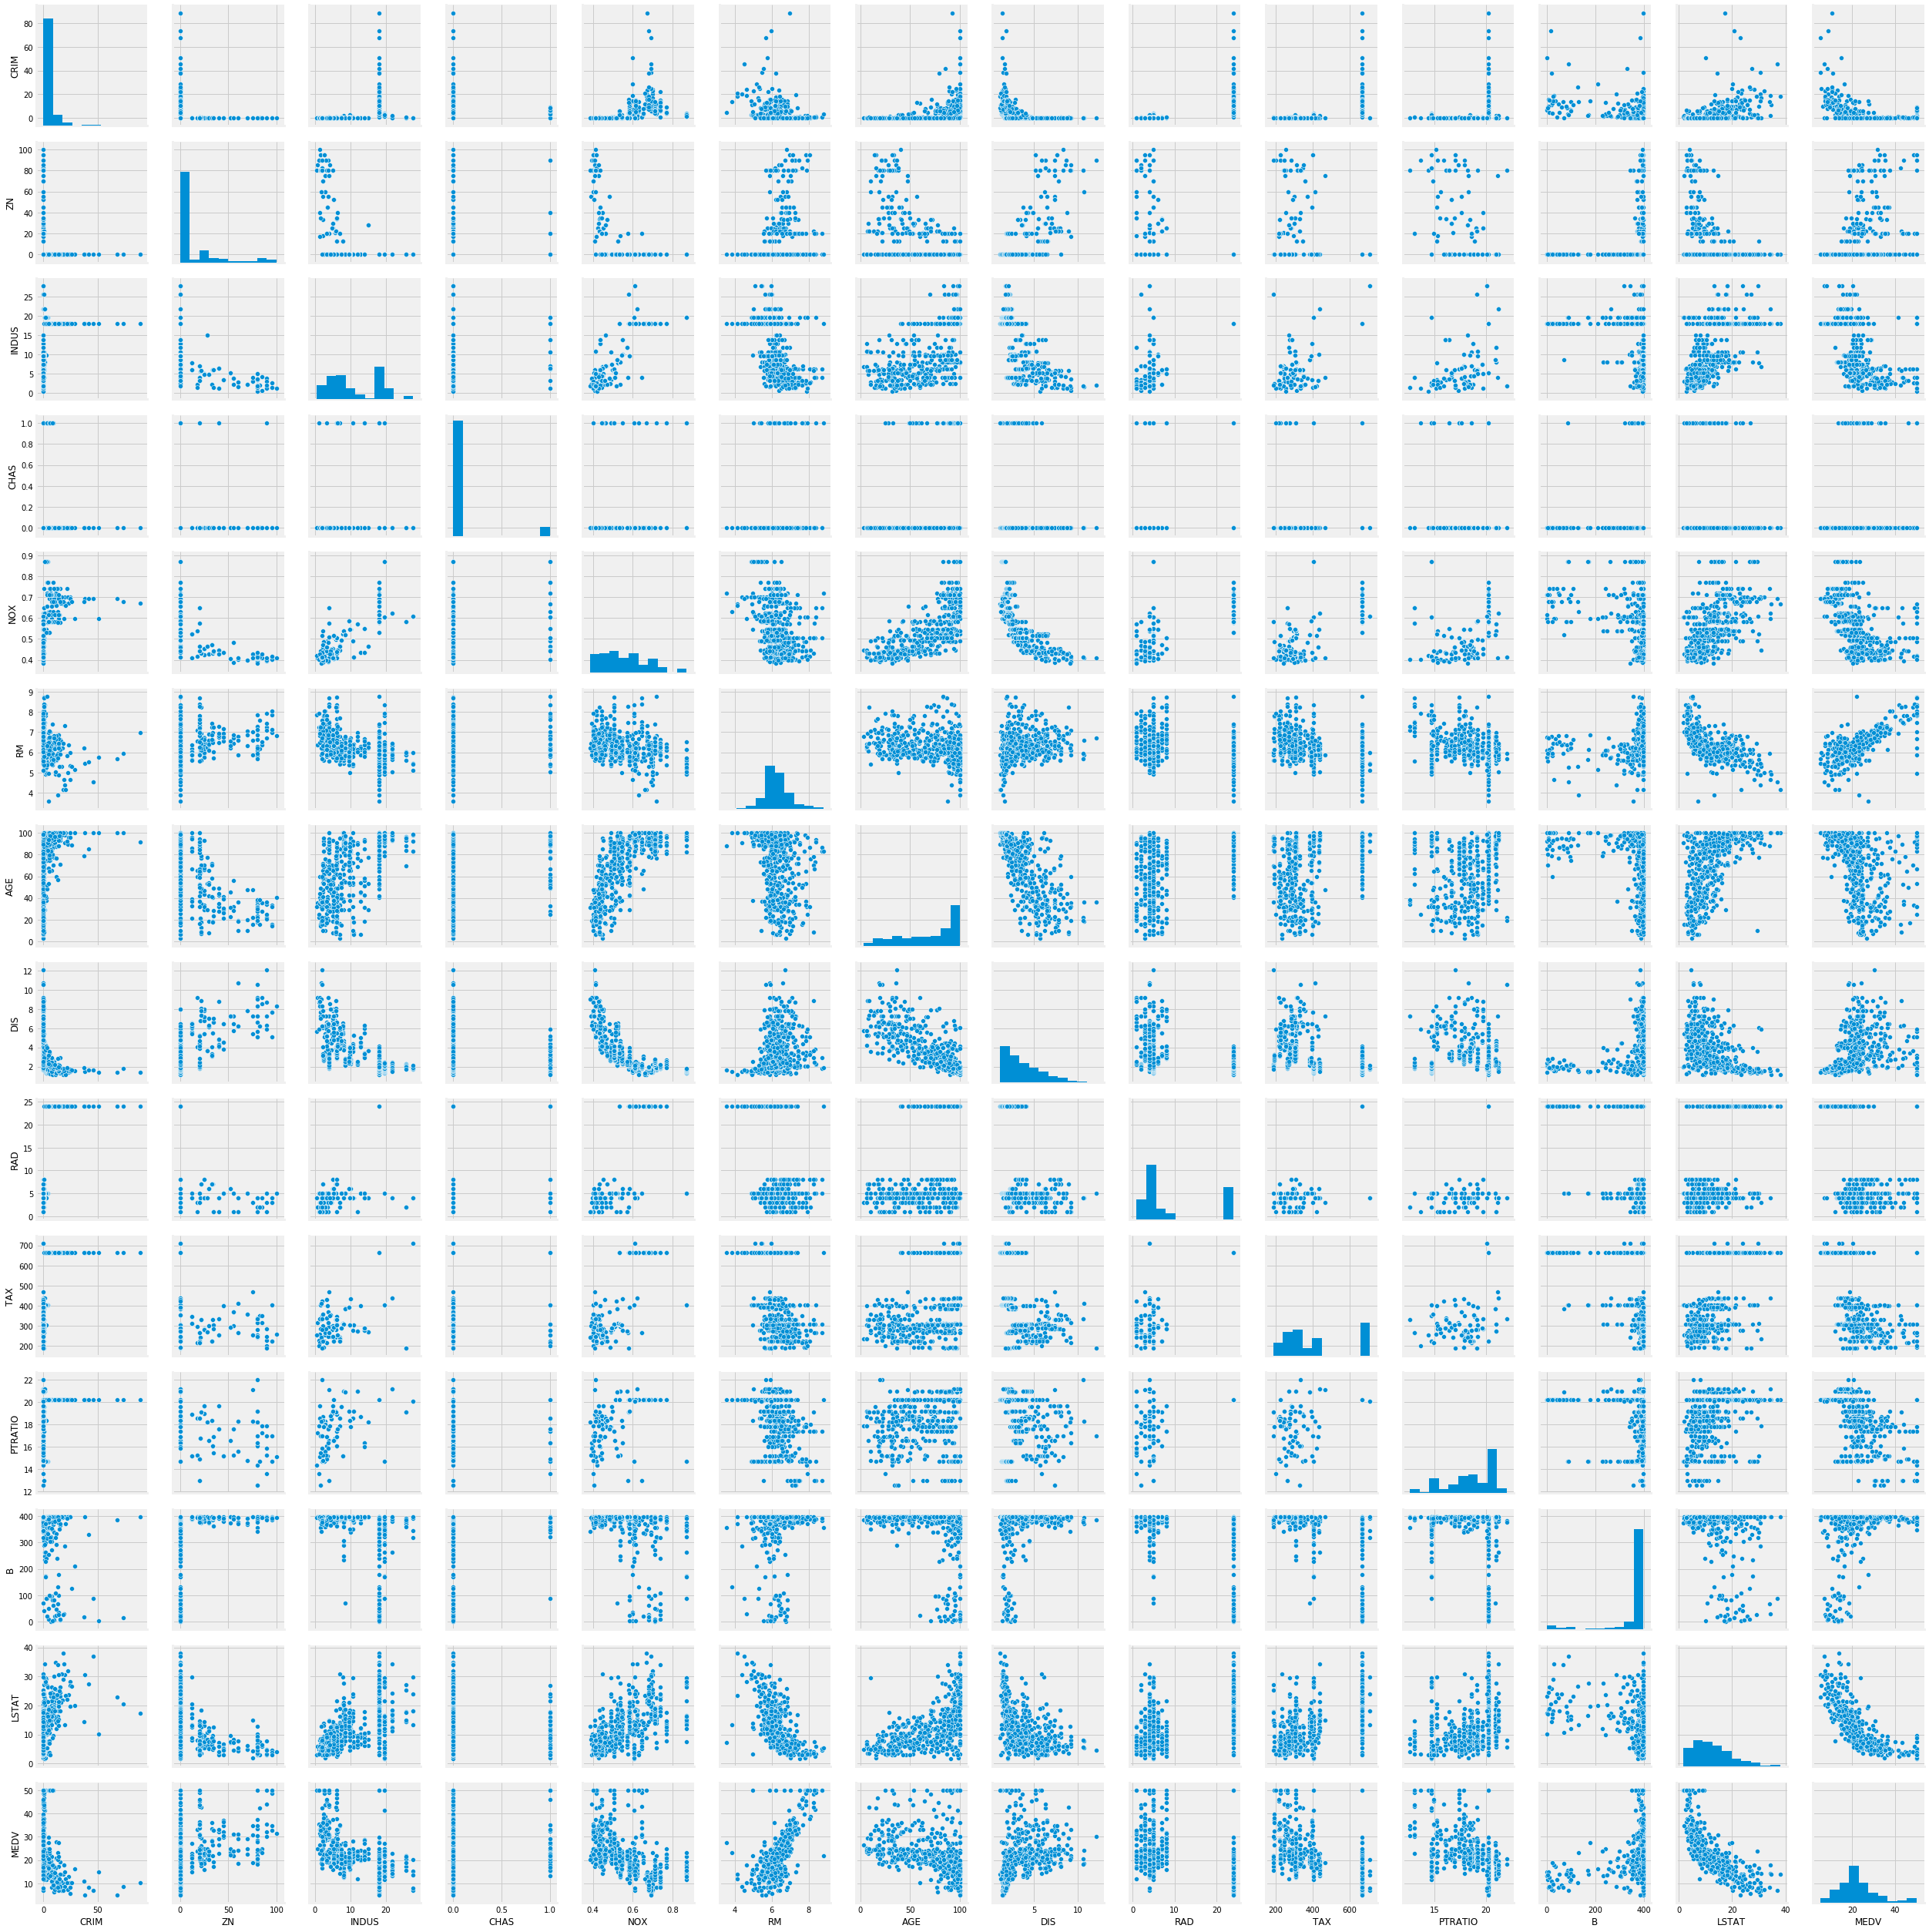

In [18]:
sns.pairplot(hd)

## Histograms

Let's look at a few interesting histograms which will tell us a bit more about our dataset—and, for that matter, a bit more about Boston. To keep things concise, we won't plot _every single_ histogram. You can look at the above Seaborn plot for that!

Text(0.5,1,'Crime Rates in Boston Neighborhoods')

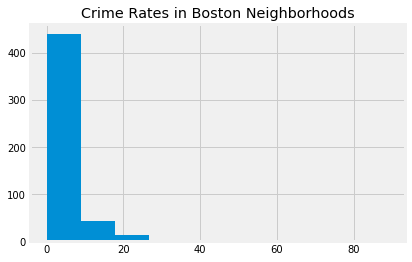

In [19]:
plt.hist(hd['CRIM'])
plt.title("Crime Rates in Boston Neighborhoods")

From this figure, we can tell that the vast majority of neighborhoods have a low crime rate.

Text(0.5,1,'Nitric Oxides Concentration in Boston Neighborhoods')

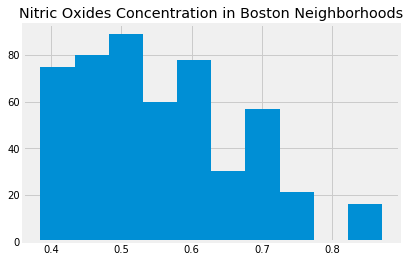

In [20]:
plt.hist(hd['NOX'])
plt.title("Nitric Oxides Concentration in Boston Neighborhoods")

What's interesting about this figure is that there isn't any stark imbalance here, as there was in the crime rate plot. We also should note that there aren't any towns with a rate below roughly 3.75.

Text(0.5,1,'Distances of Boston Neighborhoods to Employment Centers')

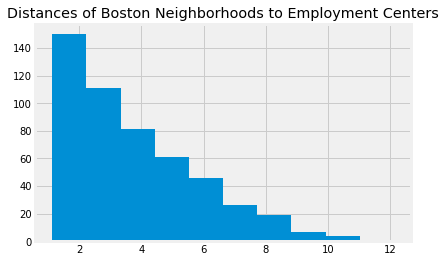

In [21]:
plt.hist(hd['DIS'])
plt.title("Distances of Boston Neighborhoods to Employment Centers")

This plot is exactly as we would suspect. Employment centers are likely at the center of the city, and so there are likely to be lots of towns close to those employment centers, _decaying_ in number as distance increases—hence the nonlinear nature of this plot.

Text(0.5,1,'Black Populations in Boston Neighborhoods')

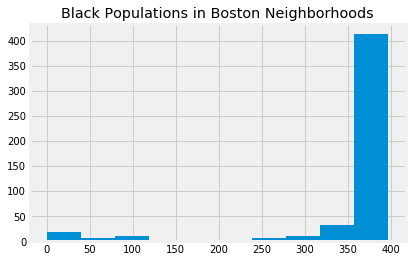

In [22]:
plt.hist(hd['B'])
plt.title("Black Populations in Boston Neighborhoods")

Here, we see that the vast majority of Boston neighborhoods have `B` > 350. I won't focus much more on this variable throughout the analysis for both ethical reasons and because there is so little data less than 350 to make meaningful statistical comparisons.

Text(0.5,1,'House Prices in Boston Neighborhoods')

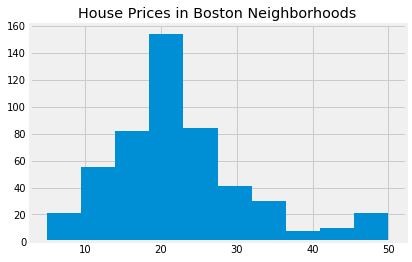

In [23]:
plt.hist(hd['MEDV'])
plt.title("House Prices in Boston Neighborhoods")

Finally, the chart we've all been waiting for: the distribution of median house prices in Boston neighborhoods. Note how most houses are in the mid-range, and then there is an uptick at the highest end.

## Scatter plots

The assignment description requests that we create a scatter plot of every numerical feature against the median home value. To keep the notebook from becoming too long, we're going to use Seaborn to do this in a single plot for us.

We'll use the median home value as the y variable because it makes sense intuitively; higher point, higher home value. The other numerical features will appear as the y variable.

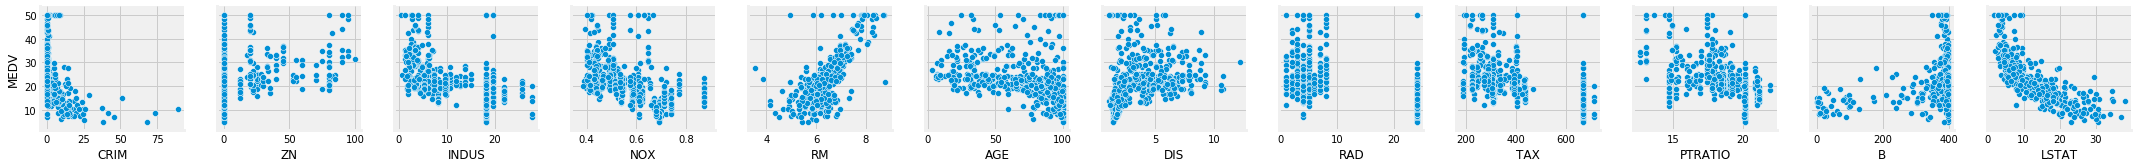

In [24]:
sns.pairplot(hd, y_vars=['MEDV'], x_vars=[key for key in hd.keys() if key not in ["MEDV", "CHAS"]])
# RAD isn't fully numerical, but we're going to plot it anyway

Interesting! There is clearly some order in this data. Let's go through the features one by one and discuss what we can see.

* **`CRIM`** — we see that high crime rates correlate to low house prices, but that the opposite is not true. Lots of low-crime towns also have low house prices. All we can say is that if a town has high crime rate, it's not likely to have high home prices. And if a town has high home prices, it probably won't have high crime rates. But if it has a low crime rate, its house prices could be low, moderate, or high.
* **`ZN`** — there's definitely _some_ correlation here, but I can't identify anything immediately meaningful about it.
* **`INDUS`** — it should come as no surprise that areas with low industry have higher home prices. Who wants factories in their back yard? It isn't an incredibly clean correlation, but it _is one_...
* **`NOX`** — towns with lower home prices generally tend to have higher nitrous oxides concentration, so perhaps this is a measure of pollutance. (Look at the `NOX` vs. `INDUS` scatter above for an interesting but unsurprising semi-correlation...)
* **`RM`** — it's no surprise that the number of rooms per home is correlated with median house price.
* **`AGE`** — no clear correlation here that I can immediately identify.
* **`DIS`** — while there's nothing incredibly clean happening here, it's worth noting that low-value houses are generally in close proximity to the employment centers—that is to say _inner city._
* **`RAD`** — if I told you that I understood what was going on here I would be lying. It _is_ interesting, however, that the towns with the _lowest_ home values have a high highway exit index here.
* **`TAX`** — there looks like there is a _very slight_ inverse correlation between home prices and property tax rates. A cynic would say that there's causation here, but I'll only claim correlation for now.
* **`PTRATIO`** — I thought there would be more correlation between house prices and pupil teacher ratio, but I guess not. There is still a slight negative correlation, but it's not as stark as I would have expected.
* **`B`** — nothing to see here, folks. (Well, perhaps there's something, but it's not immediately clear to me what that is.)
* **`LSTAT`** — finally, we get to the most beautiful scatter plot in this group: 'lower status' vs. median home value. As we'd expect, there is a _clear negative correlation_ between the proportion of 'lower status people' in a neighborhood and that neighborhood's home values. And with this in mind, we can now make a reasonable inference towards what 'lower status' means: lower income.


## Horizontal slicing

Now, it's time to slice the dataset horizontally to do something interesting. We can see from the massive pairplot earlier in the notebook that older neighborhoods tend to appear at lower distances from the employment centers. This is what we'd expect: the city likely expanded outwards as it grew over time, and because towns with lower distances to the employment centers are likely to be more central, houses at the middle of the city (where the distance to the employment centers is less) are likely to be older.

What does that tell us about the houses at the middle of the city that are _newer_, then? Were they bulldozed to create newer, expensive homes? Alternatively, are they areas that were reconstructed for affordable housing purposes? Let's figure out by horizontally slicing the dataset to isolate the neighborhoods that are relatively new but are in the middle of the city. For effect, we'll call our new sub-dataset `md` (for _mystery data_). We'll slice on the 0.5 quantile for distance and age.

In [25]:
quantiles = hd.quantile(0.5)
md = hd[(hd["DIS"] < quantiles["DIS"]) & (hd["AGE"] < quantiles["AGE"])]

Let's make sure everything went according to plan by looking at the head of the data.

In [26]:
md.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6
91,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20,22.0
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,21.7
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04,21.2


Perfect. Now, let's really _look_ at whether there is any significance to what we've just done.

I have an idea about how we might go about doing this: let's calculate the correlation (using the Pandas `DataFrame.corr` method, which calculates the Pearson standard correlation coefficient) of the variables in the original dataset, and let's do the same to our new dataset. And then let's compare the correlations, and see what changed in significance.

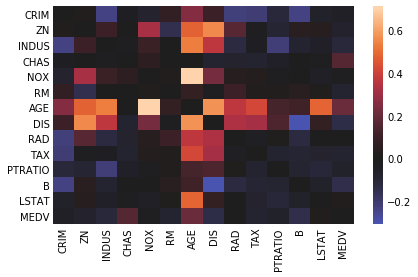

In [27]:
# Find the correlation 'delta'
corr_delta = hd.corr().abs() - md.corr().abs()

# We need to center on zero so that both positive and negative changes are visible
sns.heatmap(corr_delta, center=0)

That's super cool! Now we can see exactly what become _more significant_ and what became _less significant_ when we isolated our dataset to the given range. **`DIS` and `AGE`** show a lot of change, as we would expect—after all, we did limit their range considerably by slicing on them. What's especially interesting is the change in `NOX` vs `ZN`, as the range of neither was _directly_ limited.

In all likelihood, though, this just means that `NOX` is related to `DIS`, which the massive pairplot from before proves.


Why don't we look at the actual proportional _change in values_ when we limited our range? Doing so is simple:

In [28]:
stats_delta = (md.describe() / hd.describe()).drop('count').drop('min').replace(float('NaN'), 1).subtract(1)
# count not relevant, misleading if left present
# dropping the min because it is so large and makes it hard to focus on the other data.

stats_delta

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,-0.348188,-0.742140,-0.060728,-0.663787,0.011031,-0.006118,-0.078685,-0.291718,0.003350,-0.014936,0.006946,0.000005,-0.078098,0.063359
std,-0.516856,-0.637092,-0.105972,-0.399598,-0.547003,-0.043971,-0.573490,-0.826236,-0.003748,0.009655,-0.072735,0.128474,-0.388486,-0.043477
25%,-0.159790,0.000000,-0.219653,0.000000,0.158129,-0.011894,0.225986,0.150071,0.125000,-0.026882,0.022989,0.035451,0.223741,0.174743
50%,-0.302210,0.000000,0.000000,0.000000,0.068773,-0.014255,-0.135484,-0.133954,0.200000,0.163636,0.007874,0.004573,0.058979,0.037736
75%,-0.205044,-1.000000,0.000000,0.000000,-0.062500,-0.008153,-0.232527,-0.433479,-0.354167,-0.175676,0.000000,0.001704,-0.159835,0.020000
max,-0.824945,-0.670000,-0.075342,0.000000,-0.175660,-0.055011,-0.233000,-0.736181,0.000000,-0.063291,-0.045455,0.000000,-0.401106,0.000000


Let's look at this data in a heatmap!

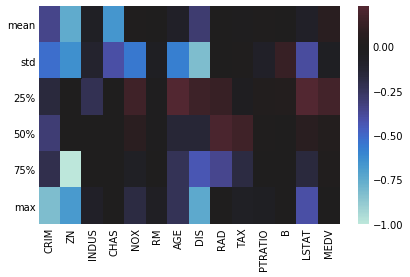

In [29]:
heatmap = sns.heatmap(stats_delta, center=0)

# help on axis label rotation from https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot/34722235
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

heatmap

Pretty neat. As a logic check, we can look at the change in the standard deviation for the `DIS` and `AGE` fields and, as we would expect, they decreased.

I'll leave further analysis of this chart to the reader. But just _look_ at the change in `ZN`'s 75%...!

---

<small>Note: `MIN` is omitted from the chart above because it's so drastic and throws off all the colors. It's unscientific to throw out a feature, I imagine, but it also distracts from the important changes here.</small>

## Vertical slicing

Because the Boston Housing Dataset is usually used for logistic regressions, let's _automatically remove the variables from the dataset that aren't significant in determining the target (`MEDV`)._ Anything with an absolute value significance less than 0.4 we'll drop from the dataset. We can do this using an approach similar to the above.

We're going to call our trimmed dataset `vd` (for `v`ertically trimmed `d`ataset).

In [30]:
vd = hd.copy()
for feature in hd.keys():
    abs_correlation = abs(vd[feature].corr(vd['MEDV']))
    if abs_correlation < 0.4:
        vd.drop(feature, inplace=True, axis=1)

Let's take a look at what's left

In [31]:
vd.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


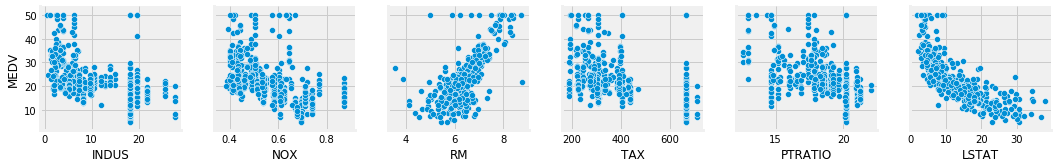

In [32]:
sns.pairplot(vd, y_vars=["MEDV"], x_vars=[key for key in vd.keys() if key != "MEDV"])

What's nice about this trimming is that the justification can really be "everything which was computed to not be significantly correlated to `MEDV` was removed." It's also just good practice with Pandas!

## Summary

This is really just preliminary analysis on the data—no machine learning here (yet). Still, I'm really happy with some of the approaches and figures I came up with in this lab.